# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

建 model (model = keras.models.Model(inputs=[input_layer], outputs=[out]))
1. input_layer <br/>
input_layer = keras.layers.Input(input_shape) <br/>
2. out <br/>
x = keras.layers.Dense(units = n_units, activation = "relu", name="hidden_layer"+str(i+1))(input_layer) <br/>
x = keras.layers.Dense(units = n_units, activation = "relu", name="hidden_layer"+str(i+1))x <br/>
out = keras. layers.Dense(units = output_units, activation = "softmax", name = "output")(x) <br/>
3. 要給參數 <br/>
input_shape <br/>  output_units <br/>   num_neurons
 

In [13]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_unit, activation = "relu", name = f"hidden_layer{i+1}")(input_layer)
        else:
            x = keras.layers.Dense(units = n_unit, activation = "relu", name = f"hidden_layer{i+1}")(x)
    
    out = keras.layers.Dense(units = output_units, activation = "softmax", name="output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    """
    Build your own model
    """
    
    return model

In [14]:
## 超參數設定

LEARNING_RATE = [0.1, 0.01, 0.001, 0.0001]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

"""
Set your required experiment parameters
"""

'\nSet your required experiment parameters\n'

In [19]:
import itertools
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for opti, lr in itertools.product(OPTIMIZER, LEARNING_RATE):
# 把舊的 Graph 清掉
    keras.backend.clear_session()
    print(f"Experiment with LR = {lr}, Optimizer = {opti}" )
    model = build_mlp(input_shape = x_train.shape[-1:])
    model.summary()
    
    optimizer = opti(lr = lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = optimizer)\
    
    model.fit(x_train, y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test, y_test),
             shuffle = True)
    
    train_loss = model.history.history['loss']
    validation_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    validation_loss = model.history.history['val_accuracy']
    
    exp_name_tag = f"exp-lr-{lr}-optimizer-{opti}"
    results[exp_name_tag] = {'train_loss': train_loss,
                            'validation_loss': validation_loss, 
                            'train_acc': train_acc,
                            'validation_acc': validation_loss}


Experiment with LR = 0.1, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoc

196/196 [==============================] - 2s 9ms/step - loss: 0.7409 - accuracy: 0.7347 - val_loss: 1.7137 - val_accuracy: 0.4832
Experiment with LR = 0.01, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 

196/196 [==============================] - 2s 9ms/step - loss: 1.2313 - accuracy: 0.5668 - val_loss: 1.3676 - val_accuracy: 0.5190
Epoch 50/50
196/196 [==============================] - 2s 9ms/step - loss: 1.2220 - accuracy: 0.5705 - val_loss: 1.4899 - val_accuracy: 0.4749
Experiment with LR = 0.001, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__

196/196 [==============================] - 2s 9ms/step - loss: 1.6898 - accuracy: 0.4124 - val_loss: 1.6940 - val_accuracy: 0.4067
Epoch 49/50
196/196 [==============================] - 2s 9ms/step - loss: 1.6870 - accuracy: 0.4127 - val_loss: 1.6929 - val_accuracy: 0.4114
Epoch 50/50
196/196 [==============================] - 2s 9ms/step - loss: 1.6834 - accuracy: 0.4130 - val_loss: 1.6869 - val_accuracy: 0.4125
Experiment with LR = 0.0001, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               1

196/196 [==============================] - 2s 9ms/step - loss: 2.0486 - accuracy: 0.2842 - val_loss: 2.0481 - val_accuracy: 0.2867
Epoch 48/50
196/196 [==============================] - 2s 9ms/step - loss: 2.0452 - accuracy: 0.2858 - val_loss: 2.0447 - val_accuracy: 0.2878
Epoch 49/50
196/196 [==============================] - 2s 9ms/step - loss: 2.0419 - accuracy: 0.2870 - val_loss: 2.0414 - val_accuracy: 0.2895
Epoch 50/50
196/196 [==============================] - 2s 9ms/step - loss: 2.0386 - accuracy: 0.2880 - val_loss: 2.0381 - val_accuracy: 0.2904
Experiment with LR = 0.1, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)             

196/196 [==============================] - 3s 15ms/step - loss: 2.3080 - accuracy: 0.0975 - val_loss: 2.3111 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 2.3074 - accuracy: 0.0992 - val_loss: 2.3131 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 2.3080 - accuracy: 0.1003 - val_loss: 2.3140 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 2.3077 - accuracy: 0.1006 - val_loss: 2.3096 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 2.3077 - accuracy: 0.1016 - val_loss: 2.3077 - val_accuracy: 0.1000
Experiment with LR = 0.01, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None,

196/196 [==============================] - 3s 15ms/step - loss: 1.8292 - accuracy: 0.3302 - val_loss: 1.8627 - val_accuracy: 0.3179
Epoch 46/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8337 - accuracy: 0.3283 - val_loss: 1.8461 - val_accuracy: 0.3249
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8304 - accuracy: 0.3293 - val_loss: 1.8957 - val_accuracy: 0.3031
Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8301 - accuracy: 0.3304 - val_loss: 1.8189 - val_accuracy: 0.3278
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8263 - accuracy: 0.3299 - val_loss: 1.9194 - val_accuracy: 0.3167
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8352 - accuracy: 0.3305 - val_loss: 1.8366 - val_accuracy: 0.3299
Experiment with LR = 0.001, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>
Model: "functional_1"
_______________________

196/196 [==============================] - 3s 15ms/step - loss: 0.8464 - accuracy: 0.6975 - val_loss: 1.8274 - val_accuracy: 0.4912
Epoch 45/50
196/196 [==============================] - 3s 15ms/step - loss: 0.8325 - accuracy: 0.6998 - val_loss: 1.7580 - val_accuracy: 0.4893
Epoch 46/50
196/196 [==============================] - 3s 15ms/step - loss: 0.8174 - accuracy: 0.7052 - val_loss: 2.0032 - val_accuracy: 0.4656
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 0.8084 - accuracy: 0.7097 - val_loss: 1.9413 - val_accuracy: 0.4799
Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 0.7918 - accuracy: 0.7151 - val_loss: 1.9269 - val_accuracy: 0.4925
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 0.7854 - accuracy: 0.7167 - val_loss: 2.0546 - val_accuracy: 0.4627
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 0.7778 - accuracy: 0.7203 - val_loss: 2.0303 - val_accuracy: 0.4791
Expe

196/196 [==============================] - 3s 15ms/step - loss: 1.0074 - accuracy: 0.6510 - val_loss: 1.4194 - val_accuracy: 0.5159
Epoch 44/50
196/196 [==============================] - 3s 16ms/step - loss: 0.9986 - accuracy: 0.6506 - val_loss: 1.3490 - val_accuracy: 0.5359
Epoch 45/50
196/196 [==============================] - 3s 15ms/step - loss: 0.9820 - accuracy: 0.6583 - val_loss: 1.4222 - val_accuracy: 0.5170
Epoch 46/50
196/196 [==============================] - 3s 15ms/step - loss: 0.9777 - accuracy: 0.6592 - val_loss: 1.4502 - val_accuracy: 0.5025
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 0.9652 - accuracy: 0.6646 - val_loss: 1.5229 - val_accuracy: 0.4945
Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 0.9577 - accuracy: 0.6665 - val_loss: 1.3407 - val_accuracy: 0.5365
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 0.9461 - accuracy: 0.6721 - val_loss: 1.4101 - val_accuracy: 0.5264
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 0.9724 - accuracy: 0.6528 - val_loss: 1.6187 - val_accuracy: 0.4826
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9525 - accuracy: 0.6600 - val_loss: 1.6695 - val_accuracy: 0.4698
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9397 - accuracy: 0.6631 - val_loss: 1.5801 - val_accuracy: 0.4901
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9241 - accuracy: 0.6705 - val_loss: 1.7044 - val_accuracy: 0.4606
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9099 - accuracy: 0.6751 - val_loss: 1.7202 - val_accuracy: 0.4579
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8944 - accuracy: 0.6810 - val_loss: 1.8485 - val_accuracy: 0.4513
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8767 - accuracy: 0.6865 - val_loss: 1.7037 - val_accuracy: 0.4798
Epoc

196/196 [==============================] - 2s 9ms/step - loss: 1.1017 - accuracy: 0.6170 - val_loss: 1.3733 - val_accuracy: 0.5092
Epoch 42/50
196/196 [==============================] - 2s 9ms/step - loss: 1.0916 - accuracy: 0.6181 - val_loss: 1.3752 - val_accuracy: 0.5094
Epoch 43/50
196/196 [==============================] - 2s 9ms/step - loss: 1.0861 - accuracy: 0.6223 - val_loss: 1.3506 - val_accuracy: 0.5262
Epoch 44/50
196/196 [==============================] - 2s 9ms/step - loss: 1.0715 - accuracy: 0.6278 - val_loss: 1.4263 - val_accuracy: 0.5068
Epoch 45/50
196/196 [==============================] - 2s 9ms/step - loss: 1.0672 - accuracy: 0.6278 - val_loss: 1.3160 - val_accuracy: 0.5321
Epoch 46/50
196/196 [==============================] - 2s 9ms/step - loss: 1.0600 - accuracy: 0.6298 - val_loss: 1.3830 - val_accuracy: 0.5177
Epoch 47/50
196/196 [==============================] - 2s 9ms/step - loss: 1.0424 - accuracy: 0.6360 - val_loss: 1.3640 - val_accuracy: 0.5204
Epoch 48/50

196/196 [==============================] - 2s 9ms/step - loss: 1.5567 - accuracy: 0.4595 - val_loss: 1.5734 - val_accuracy: 0.4515
Epoch 41/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5523 - accuracy: 0.4598 - val_loss: 1.5724 - val_accuracy: 0.4506
Epoch 42/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5484 - accuracy: 0.4614 - val_loss: 1.5722 - val_accuracy: 0.4516
Epoch 43/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5445 - accuracy: 0.4631 - val_loss: 1.5684 - val_accuracy: 0.4516
Epoch 44/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5396 - accuracy: 0.4655 - val_loss: 1.5584 - val_accuracy: 0.4551
Epoch 45/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5358 - accuracy: 0.4665 - val_loss: 1.5615 - val_accuracy: 0.4548
Epoch 46/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5317 - accuracy: 0.4678 - val_loss: 1.5546 - val_accuracy: 0.4551
Epoch 47/50

196/196 [==============================] - 2s 9ms/step - loss: 1.9080 - accuracy: 0.3333 - val_loss: 1.9073 - val_accuracy: 0.3344
Epoch 40/50
196/196 [==============================] - 2s 9ms/step - loss: 1.9047 - accuracy: 0.3344 - val_loss: 1.9041 - val_accuracy: 0.3372
Epoch 41/50
196/196 [==============================] - 2s 9ms/step - loss: 1.9014 - accuracy: 0.3350 - val_loss: 1.9010 - val_accuracy: 0.3359
Epoch 42/50
196/196 [==============================] - 2s 9ms/step - loss: 1.8982 - accuracy: 0.3365 - val_loss: 1.8978 - val_accuracy: 0.3392
Epoch 43/50
196/196 [==============================] - 2s 9ms/step - loss: 1.8951 - accuracy: 0.3369 - val_loss: 1.8948 - val_accuracy: 0.3395
Epoch 44/50
196/196 [==============================] - 2s 9ms/step - loss: 1.8921 - accuracy: 0.3381 - val_loss: 1.8920 - val_accuracy: 0.3423
Epoch 45/50
196/196 [==============================] - 2s 9ms/step - loss: 1.8891 - accuracy: 0.3390 - val_loss: 1.8891 - val_accuracy: 0.3414
Epoch 46/50

196/196 [==============================] - 2s 10ms/step - loss: 2.3068 - accuracy: 0.1014 - val_loss: 2.3213 - val_accuracy: 0.1000
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3069 - accuracy: 0.0987 - val_loss: 2.3197 - val_accuracy: 0.1000
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3061 - accuracy: 0.1006 - val_loss: 2.3187 - val_accuracy: 0.1000
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3070 - accuracy: 0.0972 - val_loss: 2.3204 - val_accuracy: 0.1000
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3066 - accuracy: 0.0993 - val_loss: 2.3173 - val_accuracy: 0.1000
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3074 - accuracy: 0.1007 - val_loss: 2.3180 - val_accuracy: 0.1000
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3075 - accuracy: 0.0987 - val_loss: 2.3190 - val_accuracy: 0.1000
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.6567 - accuracy: 0.3989 - val_loss: 1.6868 - val_accuracy: 0.3956
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6505 - accuracy: 0.4030 - val_loss: 1.6789 - val_accuracy: 0.3967
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6470 - accuracy: 0.4058 - val_loss: 1.6933 - val_accuracy: 0.3942
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6519 - accuracy: 0.4040 - val_loss: 1.6893 - val_accuracy: 0.3907
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6504 - accuracy: 0.4037 - val_loss: 1.7132 - val_accuracy: 0.3901
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6479 - accuracy: 0.4054 - val_loss: 1.6888 - val_accuracy: 0.3954
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6430 - accuracy: 0.4080 - val_loss: 1.6619 - val_accuracy: 0.4054
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 0.8194 - accuracy: 0.7070 - val_loss: 1.5189 - val_accuracy: 0.5215
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8015 - accuracy: 0.7144 - val_loss: 1.5451 - val_accuracy: 0.5222
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7849 - accuracy: 0.7195 - val_loss: 1.5301 - val_accuracy: 0.5272
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7650 - accuracy: 0.7272 - val_loss: 1.5692 - val_accuracy: 0.5268
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7541 - accuracy: 0.7313 - val_loss: 1.5867 - val_accuracy: 0.5336
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7471 - accuracy: 0.7330 - val_loss: 1.6470 - val_accuracy: 0.5151
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7181 - accuracy: 0.7430 - val_loss: 1.6429 - val_accuracy: 0.5244
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 0.9835 - accuracy: 0.6581 - val_loss: 1.3139 - val_accuracy: 0.5367
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9698 - accuracy: 0.6640 - val_loss: 1.3462 - val_accuracy: 0.5330
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9588 - accuracy: 0.6672 - val_loss: 1.3337 - val_accuracy: 0.5394
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9434 - accuracy: 0.6737 - val_loss: 1.3327 - val_accuracy: 0.5350
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9327 - accuracy: 0.6776 - val_loss: 1.3235 - val_accuracy: 0.5401
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9175 - accuracy: 0.6835 - val_loss: 1.3353 - val_accuracy: 0.5453
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9045 - accuracy: 0.6878 - val_loss: 1.3505 - val_accuracy: 0.5367
Epoc

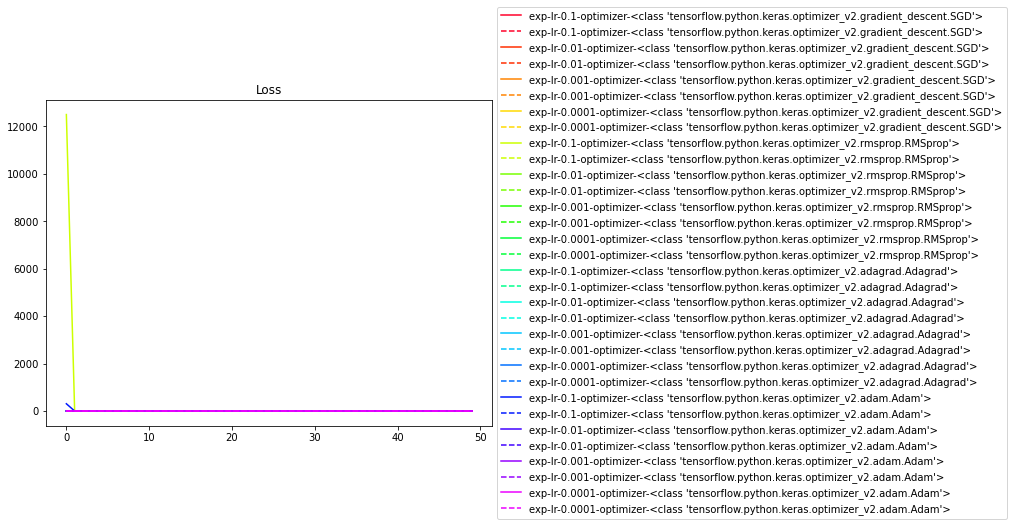

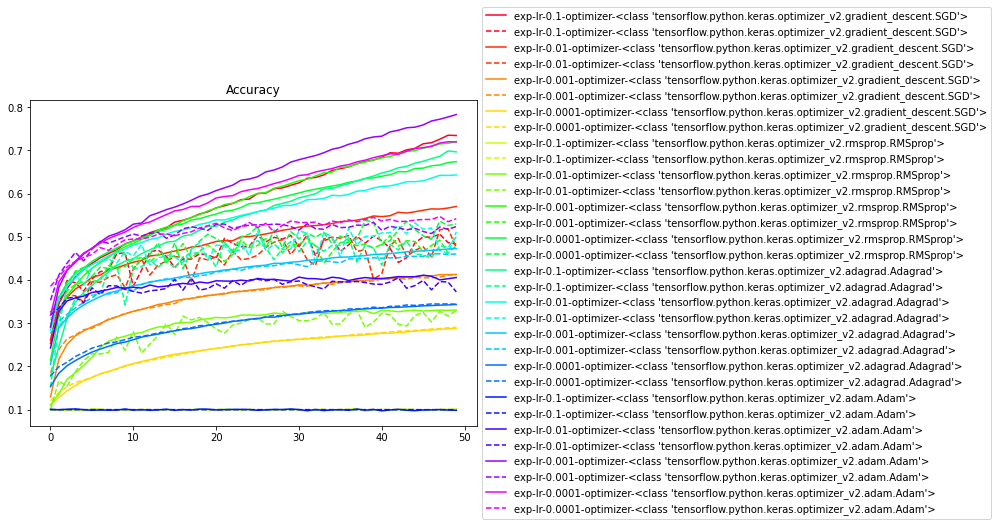

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['validation_loss'])),results[cond]['validation_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['validation_acc'])),results[cond]['validation_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [25]:
x_train

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [24]:
y_train.shape

(50000, 10)